<a href="https://colab.research.google.com/github/TatianaChambrasi/CaseStudy/blob/main/1_Case_Study_Stout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import csv
import seaborn as sns


In [27]:
filename='PS_20174392719_1491204439457_log 3.csv'

In [67]:
data = pd.read_csv(filename)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [30]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The data set has zero missing values for all variables. 

In [71]:
data.size

69988820

The dataset contains about 70M rows.

In [32]:
(data["isFraud"] == 1).sum(), (data["isFraud"] == 0).sum(), (data["isFlaggedFraud"] == 1).sum()

(8213, 6354407, 16)

It looks like 16 out of 8213 are flagged as fraud, about 1% of transactions. 

In [33]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


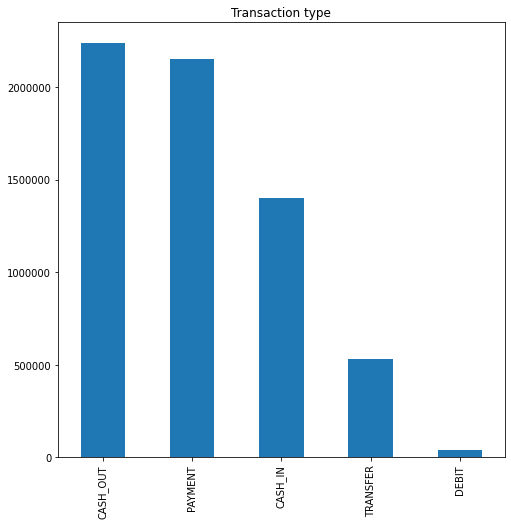

In [34]:
print(data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.ticklabel_format(style='plain')
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

What this chart is telling us that most transactions are coming from cash out and it seems debit gets the least. 

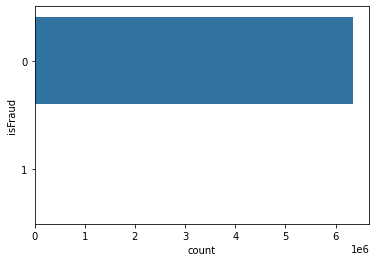

In [35]:
sns.countplot(y="isFraud",data=data)
plt.show()

The number of frauds shown in data can cause issues because there is a limited amount of data which can skew your model. 

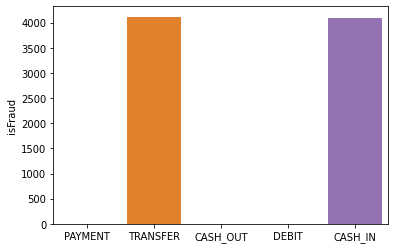

In [36]:
sns.barplot(x=data.type.unique(),y=data.groupby("type")["isFraud"].sum())


What this is telling us is fraud only happens during transfer and cash in transactions. 

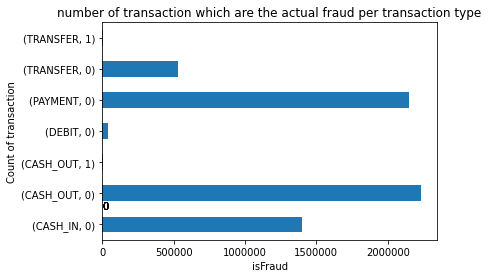

In [37]:
plt.ticklabel_format(style='plain')
ax = data.groupby(['type', 'isFraud']).size().plot(kind='barh')
ax.set_title("number of transaction which are the actual fraud per transaction type")
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))


This shows the amount of frauds happening in each transaction type, as you can see cash out and payment have the highest count. 

In [38]:
data['type'].value_counts().to_frame()


,type
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


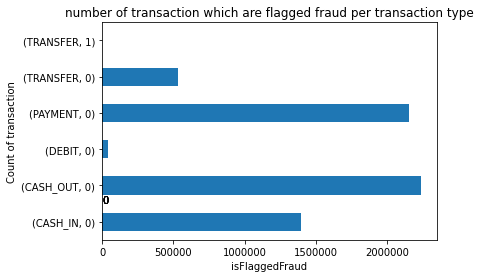

In [39]:
plt.ticklabel_format(style='plain')
ax = data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='barh')
ax.set_title("number of transaction which are flagged fraud per transaction type")
ax.set_xlabel("isFlaggedFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [40]:
data.groupby('type')['isFlaggedFraud'].value_counts().to_frame()

isFlaggedFraud
type     isFlaggedFraud                
CASH_IN  0                      1399284
CASH_OUT 0                      2237500
DEBIT    0                        41432
PAYMENT  0                      2151495
TRANSFER 0                       532893
         1                           16

Now we are looking at transactions that were flagged fraud, what this shows is 16 transactions under transfer are flagged fraud. So far this adds up to our original results also. 

In [72]:
data_copy = data.copy() # creating copy of dataset in case I need original dataset

Here we are separating the dataset into fraud and valid based on the information we found. We separate it even more into cash out and transfer since those are the two transactions that stand out. 

In [80]:
fraud = data_copy[data_new["isFraud"] == 1]
valid = data_copy[data_new["isFraud"] == 0]

In [81]:
valid = valid[(valid["type"] == "CASH_OUT")| (valid["type"] == "TRANSFER")]
data_new = data_new[(data_new["type"] == "CASH_OUT") | (data_new["type"] == "TRANSFER")]

In [75]:
data_copy.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [76]:
data_copy = data_new.drop("isFlaggedFraud",1)

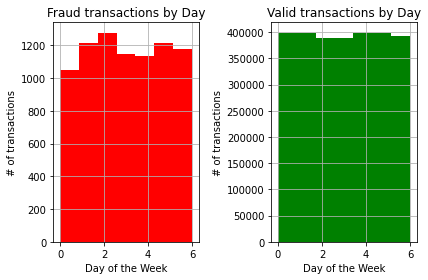

In [83]:
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

Here we can see the days of week based on fraud transactions per day which shows no relation to days of the week. Fraud transctions can happen on any day. 

In [50]:
print('skew = {}'.format( len(data) / float(len(X)) ))

skew = 1.0


In [41]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = np.array(df['isFlaggedFraud'].tolist()) 

    return X, y

In [42]:
x,y =prep_data(data)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [44]:
#RandomForest Alogrithm Prediction 
rf = RandomForestClassifier() #using default values

In [45]:
labels = data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = data['isFraud']
X = labels

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #use this random state to match my results only
#training our model
model = rf.fit(X_train,y_train)
#predicting our labels
predictions = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.71      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906277      74]
 [    713    1722]]


0.9995876960539316

In [51]:
#Logistic Regression Alogrithm Prediction
from sklearn import linear_model
logitic = linear_model.LogisticRegression()
model = logitic.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.37      0.43      0.40      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1904535    1816]
 [   1380    1055]]


0.9983256373422689

Overall, from exploring this data we found different patterns which allowed us to get more insights when it comes to fraud with different transactions. We are able to narrow down what transactions have high fraud and not any discrepancies. We applied two different machine learning alogrithms (logistic and random forest) to predict fraud detection. The dataset provided was slightly skewed. If allowed more time we could balance the dataset more and possibly create a better model in the long run. 